<a href="https://colab.research.google.com/github/soodeh-nilforoushan/NLP-Transformers/blob/main/8_Translation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install transformers datasets sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 65.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 54.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 88.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 104.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 85.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.2 MB/s eta 0:00:00


In [3]:
from datasets import load_dataset
data=load_dataset("kde4",lang1="en",lang2="fr")
data

Generating train split:   0%|          | 0/210173 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'translation'],
        num_rows: 210173
    })
})

In [4]:
small=data["train"].shuffle(seed=42).select(range(1_000))

In [5]:
small

Dataset({
    features: ['id', 'translation'],
    num_rows: 1000
})

In [6]:
data["train"][0]

{'id': '0', 'translation': {'en': 'Lauri Watts', 'fr': 'Lauri Watts'}}

In [7]:
split=small.train_test_split(seed=42)

In [8]:
split["train"][0]

{'id': '169005',
 'translation': {'en': '& Reduce Tree', 'fr': "& Refermer l' arborescence"}}

In [9]:
from transformers import AutoTokenizer
checkpoint="Helsinki-NLP/opus-mt-en-fr"
tokenizer= AutoTokenizer.from_pretrained(checkpoint)

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [10]:
en=split["train"][5]["translation"]["en"]
fr=split["train"][5]["translation"]["fr"]
en,fr

('You can either pick a file or enter its name in the Location: box.',
 'Vous pouvez soit choisir un fichier soit saisir son nom dans la zone de texte Emplacement.')

In [11]:
inputs=tokenizer(en)
inputs

{'input_ids': [213, 115, 1828, 8437, 15, 1437, 57, 3307, 96, 1129, 18, 4, 4577, 37, 5311, 3, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [12]:
targets=tokenizer(text_target=fr)
targets

{'input_ids': [344, 1069, 345, 4094, 34, 2428, 345, 9315, 113, 689, 31, 8, 1283, 5, 1470, 21708, 3, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [13]:
#look at the tokenz for input
tokenizer.convert_ids_to_tokens(targets["input_ids"])

['▁Vous',
 '▁pouvez',
 '▁soit',
 '▁choisir',
 '▁un',
 '▁fichier',
 '▁soit',
 '▁saisir',
 '▁son',
 '▁nom',
 '▁dans',
 '▁la',
 '▁zone',
 '▁de',
 '▁texte',
 '▁Emplacement',
 '.',
 '</s>']

In [14]:
#wrong language
bad_targets=tokenizer(fr)
tokenizer.convert_ids_to_tokens(bad_targets["input_ids"])

['▁V',
 'ous',
 '▁po',
 'uv',
 'ez',
 '▁so',
 'it',
 '▁cho',
 'is',
 'ir',
 '▁un',
 '▁fi',
 'chi',
 'er',
 '▁so',
 'it',
 '▁s',
 'ais',
 'ir',
 '▁son',
 '▁no',
 'm',
 '▁dans',
 '▁la',
 '▁zone',
 '▁de',
 '▁text',
 'e',
 '▁Em',
 'placement',
 '.',
 '</s>']

(array([469., 131.,  40.,  28.,  10.,  15.,  15.,   5.,   5.,   4.,   0.,
          6.,   4.,   3.,   2.,   1.,   2.,   1.,   1.,   1.,   1.,   2.,
          0.,   2.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.00000e+00, 2.67200e+01, 5.24400e+01, 7.81600e+01, 1.03880e+02,
        1.29600e+02, 1.55320e+02, 1.81040e+02, 2.06760e+02, 2.32480e+02,
        2.58200e+02, 2.83920e+02, 3.09640e+02, 3.35360e+02, 3.61080e+02,
        3.86800e+02, 4.12520e+02, 4.38240e+02, 4.63960e+02, 4.89680e+02,
        5.15400e+02, 5.41120e+02, 5.66840e+02, 5.92560e+02, 6.18280e+02,
        6.44000e+02, 6.69720e+02, 6.95440e+02, 7.21160e+02, 7.46880e+02,
        7.72600e+02, 7.98320e+02, 8.24040e+02, 8.49760e+02, 8.75480e+02,
        9.01200e+02, 9.26920e+02, 9.52640e+02, 9.78360e+02, 1.00408e+03,
        1.02980e+03, 1.05552e+03, 1.08124e+03, 1.10696e+03, 1.13268e+03,
 

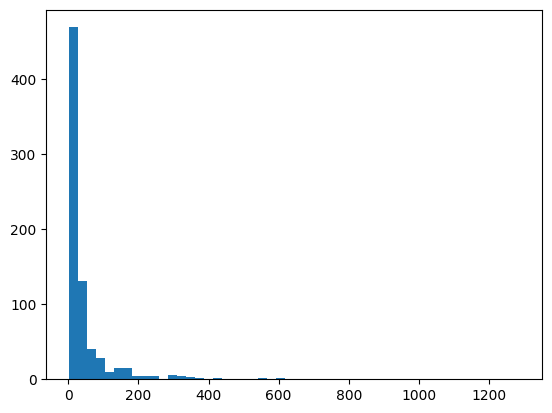

In [15]:
import matplotlib.pyplot as plt
#draw histogram for inputs
train=split["train"]["translation"]
input_lens=[len(tr["en"]) for tr in train]

plt.hist(input_lens,bins=50)
#we want to specify a maximum sequence length for truncation in input datset

As we can see most of the sentences are short
we would be justified in setting the maximum input length to be somewhere between 102 and 200

(array([491., 120.,  51.,  19.,  14.,  13.,   8.,   4.,   2.,   7.,   3.,
          4.,   4.,   3.,   0.,   2.,   1.,   2.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.00000e+00, 4.20600e+01, 8.31200e+01, 1.24180e+02, 1.65240e+02,
        2.06300e+02, 2.47360e+02, 2.88420e+02, 3.29480e+02, 3.70540e+02,
        4.11600e+02, 4.52660e+02, 4.93720e+02, 5.34780e+02, 5.75840e+02,
        6.16900e+02, 6.57960e+02, 6.99020e+02, 7.40080e+02, 7.81140e+02,
        8.22200e+02, 8.63260e+02, 9.04320e+02, 9.45380e+02, 9.86440e+02,
        1.02750e+03, 1.06856e+03, 1.10962e+03, 1.15068e+03, 1.19174e+03,
        1.23280e+03, 1.27386e+03, 1.31492e+03, 1.35598e+03, 1.39704e+03,
        1.43810e+03, 1.47916e+03, 1.52022e+03, 1.56128e+03, 1.60234e+03,
        1.64340e+03, 1.68446e+03, 1.72552e+03, 1.76658e+03, 1.80764e+03,
 

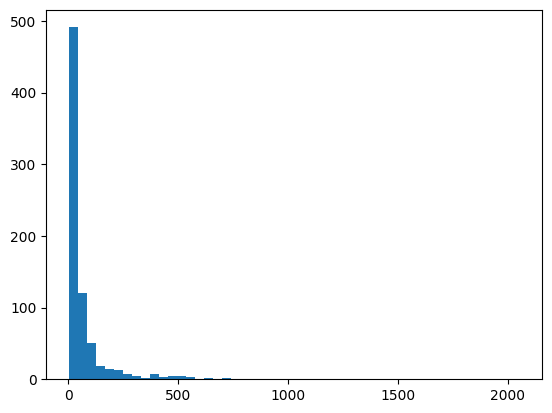

In [16]:
input_lens=[len(tr["fr"]) for tr in train]

plt.hist(input_lens,bins=50)
#we want to specify a maximum sequence length for target length

In [17]:

max_input_len=128
max_target_len=128

def tokenizer_fn(batch):
  inputs=[x['en'] for x in batch['translation']]
  targets=[x['fr'] for x in batch['translation']]

  tokenized_inputs=tokenizer(inputs, max_length=max_input_len, truncation=True)

  tokenized_targets=tokenizer(targets,max_length=max_target_len, text_target='fr', truncation=True)
#this is because the input IDs sotre the token ids for the targets, but we want to targets to be available in a fild
#called labels
  tokenized_inputs['labels']=tokenized_targets['input_ids']
  return tokenized_inputs





In [18]:
tokenized_datasets=split.map(tokenizer_fn, batched=True, remove_columns=split["train"].column_names)

Map:   0%|          | 0/750 [00:00<?, ? examples/s]

Map:   0%|          | 0/250 [00:00<?, ? examples/s]

In [19]:
from transformers import AutoModelForSeq2SeqLM
#seq2seq is the type of model required for translation and LM means language model, which describes
#how the decoder works.
model=AutoModelForSeq2SeqLM.from_pretrained(checkpoint)

In [20]:
from transformers.data import data_collator
from transformers import DataCollatorForSeq2Seq
#As you recall, the data_collator expects as input a list of samples where each sample is a dict.
data_collator= DataCollatorForSeq2Seq(tokenizer, model=model)

In [21]:
#test part of tokenized train data
[tokenized_datasets["train"][i] for i in range(1,3)]

[{'input_ids': [526, 3261, 0],
  'attention_mask': [1, 1, 1],
  'labels': [526, 3261, 0]},
 {'input_ids': [3492,
   3070,
   6443,
   37,
   443,
   61,
   32,
   317,
   2203,
   4824,
   514,
   1807,
   971,
   4,
   4124,
   3,
   0],
  'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  'labels': [8371,
   158,
   617,
   5,
   329,
   1167,
   5,
   531,
   8811,
   9,
   402,
   30362,
   2069,
   50,
   37,
   350,
   42572,
   63,
   95,
   11423,
   14751,
   9644,
   2,
   971,
   590,
   14,
   6,
   13077,
   1547,
   3,
   0]}]

In [22]:
#The next step is to test our data collater on the above inputs.
batch=data_collator([tokenized_datasets["train"][i] for i in range(1,3)])
batch.keys()
#We'll also print out the keys of the result to see if we get back anything new.

dict_keys(['input_ids', 'attention_mask', 'labels', 'decoder_input_ids'])

 the decoder seems to have done one extra step, which was to create another field called decoder input IDs.

In [23]:
batch["labels"]

tensor([[  526,  3261,     0,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
          -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
          -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
          -100],
        [ 8371,   158,   617,     5,   329,  1167,     5,   531,  8811,     9,
           402, 30362,  2069,    50,    37,   350, 42572,    63,    95, 11423,
         14751,  9644,     2,   971,   590,    14,     6, 13077,  1547,     3,
             0]])

In [24]:
batch["input_ids"]

tensor([[  526,  3261,     0, 59513, 59513, 59513, 59513, 59513, 59513, 59513,
         59513, 59513, 59513, 59513, 59513, 59513, 59513],
        [ 3492,  3070,  6443,    37,   443,    61,    32,   317,  2203,  4824,
           514,  1807,   971,     4,  4124,     3,     0]])

In [25]:
batch["decoder_input_ids"]

tensor([[59513,   526,  3261,     0, 59513, 59513, 59513, 59513, 59513, 59513,
         59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513,
         59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513,
         59513],
        [59513,  8371,   158,   617,     5,   329,  1167,     5,   531,  8811,
             9,   402, 30362,  2069,    50,    37,   350, 42572,    63,    95,
         11423, 14751,  9644,     2,   971,   590,    14,     6, 13077,  1547,
             3]])

the first sentence was the shorter one, as per the above results.
We can see that the decoder input IDs have been padded with the ID 59513.
But interestingly, this idea also appears at the beginning of both sentences.
So it seems to have a dual function of being both a start token and a pad token for the decoder inputs.

So in order to get a better idea of what this special token is, we're going to convert the IDs back into tokens for the decoder input IDs.
the mystery token is in fact a pat.

In [26]:
tokenizer.convert_ids_to_tokens(batch["decoder_input_ids"][0])
#the first token is pad

['<pad>',
 '▁K',
 'DE',
 '</s>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>']

the next step is to convert the targets back into tokens as well, just to confirm that the decoder inputs really are just a shifted version of the targets

In [27]:
tokenizer.convert_ids_to_tokens(batch["labels"][0])

['▁K',
 'DE',
 '</s>',
 '<unk>',
 '<unk>',
 '<unk>',
 '<unk>',
 '<unk>',
 '<unk>',
 '<unk>',
 '<unk>',
 '<unk>',
 '<unk>',
 '<unk>',
 '<unk>',
 '<unk>',
 '<unk>',
 '<unk>',
 '<unk>',
 '<unk>',
 '<unk>',
 '<unk>',
 '<unk>',
 '<unk>',
 '<unk>',
 '<unk>',
 '<unk>',
 '<unk>',
 '<unk>',
 '<unk>',
 '<unk>']

for the targets, we use the unknown tag for any target beyond the end of sentence tag.

In [28]:
split["train"][1]

{'id': '47571', 'translation': {'en': 'KDE', 'fr': 'KDE'}}

In [29]:
!pip install sacrebleu bert-score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 8.0 MB/s eta 0:00:00


In [30]:
from datasets import load_metric

In [31]:
bleu_metric=load_metric("sacrebleu")
bert_metric=load_metric("bertscore")

<ipython-input-31-65566918848d>:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  bleu_metric=load_metric("sacrebleu")


In [32]:
#targets or references must be in a list, for bleu there can be multiple acceptable refrenece translations
bleu_metric.compute(predictions=["I love cats"],references=[["I like cats"]])

{'score': 0.0,
 'counts': [2, 0, 0, 0],
 'totals': [3, 2, 1, 0],
 'precisions': [66.66666666666667, 25.0, 25.0, 0.0],
 'bp': 1.0,
 'sys_len': 3,
 'ref_len': 3}

 the score turns out to be zero because the blue score doesn't really work with short sentences

In [33]:
s="Marian is an efficien NMT framework written in c++"
bleu_metric.compute(predictions=[s],references=[[s]])

{'score': 100.00000000000004,
 'counts': [11, 10, 9, 8],
 'totals': [11, 10, 9, 8],
 'precisions': [100.0, 100.0, 100.0, 100.0],
 'bp': 1.0,
 'sys_len': 11,
 'ref_len': 11}

the blue score metric compares and grams either they match or they don't.

This means that it's not capable of detecting similar words or words with the same meaning.

This is a real downside of this metric because for translation, what we really care about is that the

meaning is correct, not that a specific set of words were used.

This is also why the Blue Score accepts multiple references to begin with.

In [34]:
bert_metric.compute(predictions=["I love cats"],references=[["I like cats"]],lang="en"

)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'precision': [0.9803369045257568],
 'recall': [0.9803369045257568],
 'f1': [0.9803369045257568],
 'hashcode': 'roberta-large_L17_no-idf_version=0.3.12(hug_trans=4.32.0)'}

In [35]:
import numpy as np
def compute_metrics(preds_and_labels):

  #preds are not logits, but toke ids
  preds,labels=preds_and_labels

  #convert predictions into words
  decoded_preds=tokenizer.batch_decode(preds,skip_special_tokens=True)

  #for any -100 label, replace with pad toke id
  labels=np.where(labels !=-100 , labels, tokenizer.pad_token_id)

  #convert labels into words
  decoded_labels=tokenizer.batch_decode(labels,skip_special_tokena=True)

  #get rid of whitespace
  #and also put targets into lists
  decoded_preds=[pred.strip() for pred in decoded_preds]
  decoded_labels=[[label.strip] for label in decoded_labels]

  bleu =bleu_metric.compute(predictions=decoded_preds, references=decoded_labels)
  bert_score =bert_metric.compute(predictions=decoded_preds, references=decoded_labels, lang="fr")

  return {"bleu": bleu["score"]," bert_score":np.mean(bert_score["f1"])}


In [36]:
!pip install datasets transformers==4.28.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 51.8 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.32.0
    Uninstalling transformers-4.32.0:
      Successfully uninstalled transformers-4.32.0


In [43]:
import importlib
dir(importlib)

['_RELOADING',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__import__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_abc',
 '_adapters',
 '_bootstrap',
 '_bootstrap_external',
 '_common',
 '_imp',
 '_pack_uint32',
 '_unpack_uint32',
 'abc',
 'find_loader',
 'import_module',
 'invalidate_caches',
 'machinery',
 'metadata',
 'readers',
 'reload',
 'resources',
 'sys',
 'util',
 'warnings']

In [47]:
!pip install transformers==4.27.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 42.2 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.28.0
    Uninstalling transformers-4.28.0:
      Successfully uninstalled transformers-4.28.0


In [48]:
from transformers import Seq2SeqTrainingArguments
training_args = Seq2SeqTrainingArguments(
    "finetuned-model",
    evaluation_strategy="no",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=64,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=3,
    predict_with_generate=True,
    fp16=True
)

**predict_with_generate=True**

we need to set this to true so that during evaluation the model will be evaluated without using the true targets as input into the decoder.

Instead, the decoder will generate the translation by itself in an auto regressive manner, just like a language model.

In other words, it will generate one token at a time, and each token it generates will be fed back into the input for the next time step.

**evaluation_strategy="no"**

because even making predictions with a large model like this is so computationally intensive, we're going to set evaluation strategy to no. Instead, it will run evaluation manually before and after training to check whether or not our model has improved.

For the same reason, we also set FP 16 to true, which will cause the model to use floating point numbers with 16 bits instead of 32 bits.



In [53]:
!pip install torch==2.0.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 73.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.1/177.1 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 13.4 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.13.1
    Uninstalling torch-1.13.1:
      Successfully uninstalled torch-1.13.1


In [49]:
from transformers import Seq2SeqTrainer

trainer=Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    tokenizer=tokenizer,

)



RuntimeError: ignored

In [ ]:
#check metrics before start
# our PRE-TRAINED model has already been trained to translate English into French.
#As such, its performance shouldn't be too bad.

trainer.evaluate(max_length=max_target_len)



In [ ]:
trainer.train()

In [ ]:
#lets check our metrics again
trainer.evaluate(max_length=max_target_len)

In [ ]:
trainer.save_mode("my_saved_model")

In [ ]:
from transformers import pipeline
translator=pipeline("translation",model="my_saved_model",device=0)

In [ ]:
translator("I hope I could complete my NLP journey with this dataset")